# Assignment 01: Supervised learning, Linear models, and Loss functions



## Data set 

In this assignment, you'll be working with some data on possums.  It's a relatively small data set, but it's a good size to get you started with ordinary least squares (OLS) and least absolute deviation (LAD), and to gain experience with supervised learning in general.  You're going to write your own methods to fit both OLS and LAD models, and then at the end compare them to the models produced by the `statsmodels` package.

For this assignment, we will examine some data representing possums in Australia and New Guinea.
The code below loads in a pandas data frame with 46 observations on the following 6 variables:

sex: Sex, either m (male) or f (female).  
age: Age in years.  
headL: Head length, in mm.  
skullW: Skull width, in mm.  
totalL: Total length, in cm.  
tailL: Tail length, in cm.

## Task 1: OLS estimation and plotting


In [2]:
#It's dangerous to go alone.  Take these!
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as ss 
import scipy.optimize as so
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Read in the data you will need for this assignment
possum_data=pd.read_csv('possum.csv')

In [ ]:
### Question 1:

Investigate the relationship between the possum's age and it's tail length by plotting a scatter plot of the `age` and `tailL` columns. Label your plot and your axes. You might want to add an `alpha` in case some data are overlapping.  Perform any other exploratory analysis you think might be useful (optional.)

,sex,age,headL,skullW,totalL,tailL
0,m,8,94.1,60.4,89.0,36.0
1,f,6,92.5,57.6,91.5,36.5
2,f,6,94.0,60.0,95.5,39.0
3,f,6,93.2,57.1,92.0,38.0
4,f,2,91.5,56.3,85.5,36.0


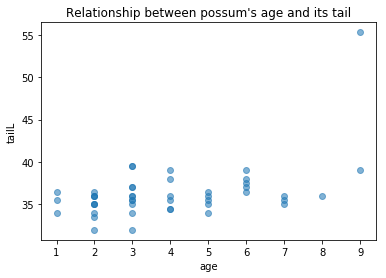

In [3]:
from IPython.display import display
display(possum_data.head())
plt.scatter(possum_data.loc[:,'age'],possum_data.loc[:,'tailL'], alpha = 0.56)
plt.xlabel("age")
plt.ylabel("tailL")
plt.title("Relationship between possum's age and its tail")
plt.show()



### Question 2:

Recall that the linear model, we obtain predictions by computing 

$$ \mathbf{\hat{y}} = \mathbf{X} \beta $$

Here, $\mathbf{X}$ is a design matrix, $\beta$ are coefficients, and $\mathbf{\hat{y}}$ are fitted/estimates/predicted values. Define a model-prediction function `yhat = linearModelPredict(beta,X)` that takes a parameter vector `beta` and a matrix `X` of inputs, and produces a vector `yhat` containing the predicted (fitted) values that correspond to each row of the input matrix. Assume that `beta` has $p$ rows and $1$ column, and that `X` has $n$ rows and $p$ columns.

Hint: As of Python 3.5, the `@` symbol can be used for matrix multiplication.

In [4]:
def linearModelPredict(b,X):
    X_in = np.array(X)
    input_matrix = X_in.reshape(X_in.shape)
    parameter_vector = np.array(b).reshape(-1,1)
    y_hat_out = input_matrix@parameter_vector
    return y_hat_out
#simple example 
linearModelPredict([6,8],[[1,2], [1,4], [1, 7]])



array([[22],
       [38],
       [62]])

### Question 3:

Write a function `linearModelLossRSS` which computes the loss function for an OLS model parameterized by $\beta$, as well as the gradient of the loss. Define a squared error loss function `(loss, gradient) = linearModelLossRSS(beta,X,y)` that takes a parameter vector `beta`, a matrix `X` of inputs, and a vector `y` of observed values, and produces the sum of squared errors between the observed and predicted (fitted) values, along with the gradient of the loss. Assume that `theta` has $p$ rows and $1$ column, and that `X` has $n$ rows and $p$ column, and that `y` has `n` rows and `1` column.

In [5]:
def linearModelLossRSS(b,X,y):
    X_in = np.array(X)
    input_matrix = X_in
    parameter_vector = np.array(b).reshape(-1,1)
    y_hat_out = input_matrix@parameter_vector
    y_observed = np.array(y).reshape(-1,1)
    squared_error = (y_observed - y_hat_out)**2
    residual_sum_of_squares = np.sum(squared_error)
    Gradient = -2*input_matrix.T@y_observed + 2*input_matrix.T@y_hat_out
    gradient = np.zeros(len(Gradient))
    for i in range(len(Gradient)):
        gradient[i] = Gradient[i]
    return (residual_sum_of_squares, gradient)
#simple example
linearModelLossRSS([6,8],[[1,2], [1,4], [1, 7]],[1,3,5])

(4915, array([  226.,  1162.]))

### Question 4: 

#### Part 1

Now that you've implemented a loss function in question 3, it is now time to minimize it to fit the data!

Write a function `linearModelFit` to fit a linear model.  The function should take as its first argument an 2d-array `X` which houses the input data with one example per row, as its second argument a 1d-array `y` of outcomes with one example per row, and as its third argument a function `lossfcn` which returns as a tuple the value of the loss, as well as the gradient of the loss.

Use this function to estimate the parameters that describe the relationship between a possum's age and its tail length, i.e., $\widehat{\mathit{TailLength}} = \beta_0 + \beta_1 \mathit{age}$.

In [8]:
def linearModelFit(X,y,lossfcn = linearModelLossRSS):
    
    list_of_X = list(X)
    index_for_ones = len(list_of_X)
    list_of_ones = list(np.full(index_for_ones,1))
    X_in = [list_of_ones,list_of_X]
    y_in = list(y)
    bstart = np.zeros(len(X_in))
    RESULT = so.minimize(lossfcn,bstart,args=(np.array(X_in).T,y_in),jac=True)
    estimated_betas = RESULT.x
    estimated_betas_1 = np.array(list(estimated_betas)).reshape(-1,1)
    y_observed = np.array(y_in).reshape(-1,1)
    y_mean = y_observed.mean()
    y_mean_1 = np.full((y_observed.shape), y_mean)
    squared_error = (y_observed - y_mean)**2
    residual_sum_of_squares_mean = np.sum(squared_error)
    y_hat_out = np.array(X_in).T@estimated_betas_1
    squared_error = (y_observed - y_hat_out)**2
    residual_sum_of_squares = np.sum(squared_error)
    R2 = 1 - (residual_sum_of_squares/residual_sum_of_squares_mean)
    return (estimated_betas,R2)
linearModelFit(pd.Series(possum_data['age']).values,pd.Series(possum_data['tailL']).values,lossfcn = linearModelLossRSS)


(array([ 33.35046603,   0.75372837]), 0.22286587947604064)

#### Part 2

Using your solution, plot the data points and the fitted line below. Label your plot and your axes.

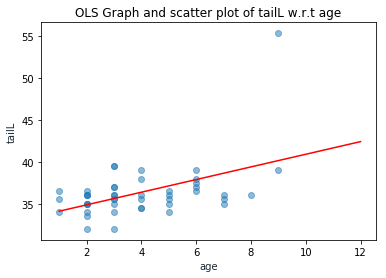

In [7]:
age = np.linspace(1,12,12)
tailL = 0.75372837*age+33.35046603
plt.plot(age, tailL, '-r', label='tailL = 0.75372837*age+33.35046603')
plt.title('OLS Graph and scatter plot of tailL w.r.t age')
plt.xlabel('age', color='#1C2833')
plt.ylabel('tailL', color='#1C2833')
plt.scatter(possum_data.loc[:,'age'],possum_data.loc[:,'tailL'], alpha = 0.5)
#plt.ylim(0, 90)
#plt.xlim(0, 12)
plt.show()

# Task 2: Least Absolute Deviation Loss

### Question 1: 

In the previous section, we worked with the squared loss.  Now, we'll implement a linear model with least absolute deviation loss.

Write a function `linearModelLossLAD` which computes the least absolute deviation loss function for a linear model  parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument a 2d-array `X` of data, and as its third argument a 1d-array `y` of observed outcomes.



In [9]:
def linearModelLossLAD(b,X,y):
    input_matrix = np.array(X)
    parameter_vector = np.array(b).reshape(-1,1)
    y_hat_out = input_matrix@parameter_vector
    y_observed = np.array(y).reshape(-1,1)
    absolute_error = np.absolute(y_observed - y_hat_out)
    sum_abs_dev = np.sum(absolute_error)
    Gradient = -input_matrix.T@np.sign(y_observed-input_matrix@parameter_vector)
    grad = np.zeros(len(Gradient))
    for i in range(len(Gradient)):
        grad[i] = Gradient[i]
    return (sum_abs_dev,grad)
#simple example
linearModelLossLAD([6,8],[[1,2], [1,4], [1, 7]],[1,3,5])

(113, array([  3.,  13.]))

### Question 2

Use `linearModelLossLAD` to fit a linear model with least absolute deviation loss.  Report the coefficients of the model, the R squared, and plot the fit.

In [10]:
def linearModelLADFit(X,y,lossfcnLAD=linearModelLossLAD):
    list_of_X = list(X)
    index_for_ones = len(list_of_X)
    list_of_ones = list(np.full(index_for_ones,1))
    X_in = [list_of_ones,list_of_X]
    y_in = list(y)
    bstart = np.zeros(len(X_in))
    RESULT = so.minimize(lossfcnLAD,bstart,args=(np.array(X_in).T,y_in),jac=True)
    estimated_betas = RESULT.x
    estimated_betas_1 = np.array(list(estimated_betas)).reshape(-1,1)
    y_observed = np.array(y_in).reshape(-1,1)
    y_mean = y_observed.mean()
    y_mean_1 = np.full((y_observed.shape), y_mean)
    absolute_error_mean = np.absolute(y_observed - y_mean)
    residual_sum_of_absolute_mean = np.sum(absolute_error_mean)
    y_hat_out = np.array(X_in).T@estimated_betas_1
    absolute_error = np.absolute(y_observed - y_hat_out)
    residual_sum_of_squares = np.sum(absolute_error)
    R2 = 1 - (residual_sum_of_squares/residual_sum_of_absolute_mean)
    return (estimated_betas,R2)
#simple example
linearModelLADFit(pd.Series(possum_data['age']).values,pd.Series(possum_data['tailL']).values,lossfcnLAD=linearModelLossLAD)

(array([ 34.5       ,   0.33333333]), 0.086340852130325496)

Plot the fit below

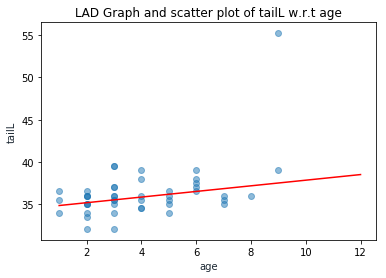

In [11]:
age = np.linspace(1,12,12)
tailL = 0.33333333*age+34.5
plt.plot(age, tailL, '-r', label='tailL = 0.33333333*age+34.5')
plt.title('LAD Graph and scatter plot of tailL w.r.t age')
plt.xlabel('age', color='#1C2833')
plt.ylabel('tailL', color='#1C2833')
#plt.legend(loc='upper left')
#plt.set_ylim(0, 40)
plt.scatter(possum_data.loc[:,'age'],possum_data.loc[:,'tailL'], alpha = 0.5)
#plt.ylim(0, 90)
#plt.xlim(0, 12)
plt.show()


# Task 3: Comparing With `Statsmodels`


Fit both an OLS and a LAD model with `statsmodels`. Compare coefficient estimates, R squared values, and plot the fits. Discuss any differences or similarities between your implementation and `statsmodels`, and discuss any differences between the OLS model and the LAD model.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     12.62
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           0.000925
Time:                        15:42:32   Log-Likelihood:                -114.32
No. Observations:                  46   AIC:                             232.6
Df Residuals:                      44   BIC:                             236.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.3505      0.947     35.222      0.0

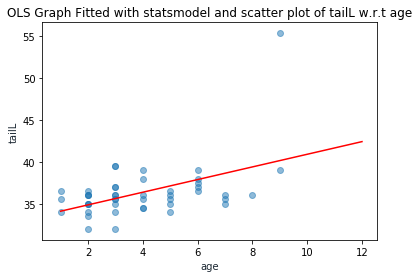

                         QuantReg Regression Results                          
Dep. Variable:                  tailL   Pseudo R-squared:              0.03058
Model:                       QuantReg   Bandwidth:                       2.586
Method:                 Least Squares   Sparsity:                        4.962
Date:                Mon, 16 Sep 2019   No. Observations:                   46
Time:                        15:42:32   Df Residuals:                       44
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5000      0.791     43.617      0.000      32.906      36.094
age            0.3333      0.177      1.881      0.067      -0.024       0.691


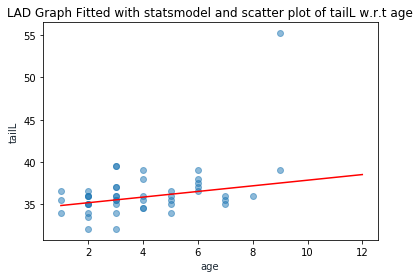

In [14]:
#Fit OLS model with statsmodels
X = pd.Series(possum_data['age']).values
X_1 = np.array(X)
y = pd.Series(possum_data['tailL']).values
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
print(results.summary())
#plot fit OLS
age = np.linspace(1,12,12)
tailL = 0.7537*age+33.350
plt.plot(age, tailL, '-r', label='tailL = 0.7537*age+33.350')
plt.title('OLS Graph Fitted with statsmodel and scatter plot of tailL w.r.t age')
plt.xlabel('age', color='#1C2833')
plt.ylabel('tailL', color='#1C2833')
plt.scatter(possum_data.loc[:,'age'],possum_data.loc[:,'tailL'], alpha = 0.5)
plt.show()
#Fit LAD model with statsmodels
possum_data=pd.read_csv('possum.csv')
mod = smf.quantreg('tailL ~ age', possum_data)
res = mod.fit(q=.5)
print(res.summary())
#plot fit LAD
age = np.linspace(1,12,12)
tailL = 0.3333*age+34.5000
plt.plot(age, tailL, '-r', label='0.3333*age+34.5000')
plt.title('LAD Graph Fitted with statsmodel and scatter plot of tailL w.r.t age')
plt.xlabel('age', color='#1C2833')
plt.ylabel('tailL', color='#1C2833')
#plt.legend(loc='upper left')
#plt.set_ylim(0, 40)
plt.scatter(possum_data.loc[:,'age'],possum_data.loc[:,'tailL'], alpha = 0.5)
#plt.ylim(0, 90)
#plt.xlim(0, 12)
plt.show()



Discuss differences below.

***My OLS and OLS fitted with statsmodels:***
in my OLS: coefficiens and R2 are:
(array([ 33.35046603,   0.75372837]), 0.22286587947604064)
in OLS fitted with statsmodels: coefficiens and R2 are:
(array([ 33.3505,   0.7537]), 0.223)
As we can see when we round coefficiens and R2 of my OLS with 4 number of decimals (for coefiicients) and 3 
number of decimals for R2, we get the coefficiens and R2 for OLS fitted. Thus they are (in this case) the same
==================================
***My LAD and LAD fitted with statsmodels:***
in my LAD: coefficiens and R2 are:
(array([ 34.5       ,   0.33333333]), 0.086340852130325496)
in OLS fitted with statsmodels: coefficiens and pseudo R2 are:
(array([ 34.5000      ,   0.3333]), 0.03058)
Again coefficients are the same but it seems R2's are not the same

If we compare the std err of OLS fitted  against LAD fitted we can see that the standard error
for computing coefficients using LAD fitted (0.791 for Intercept (tailL) and 0.177 for age )is smaller than OLS fitted (0.947 for constant(intercept or tailL) and 0.212 for x1 (age)).

In [ ]:
which shows fitted LAD is more accurate than fitted OLS. If we look at their graphs we see that the the 
fitted LAD(red line) covers more data compare to fitted OLS